In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df = sns.load_dataset('iris')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


What does the distribution of petal lengths look like?


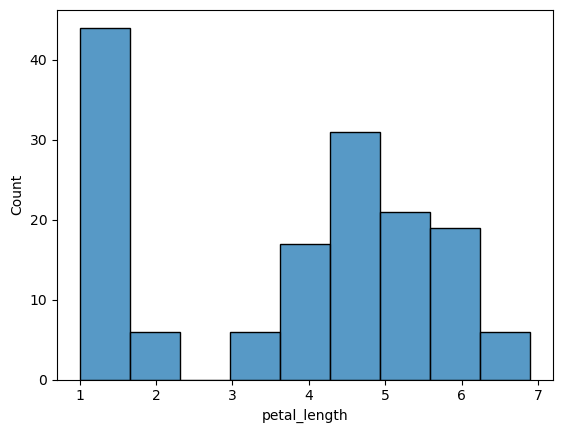

In [42]:
sns.histplot(df.petal_length)
plt.show()

The distribution has a double bell look with first bell between 1 and 1.75 in length and the second between 4.25 and 5

Is there a relationship between petal length and petal width?


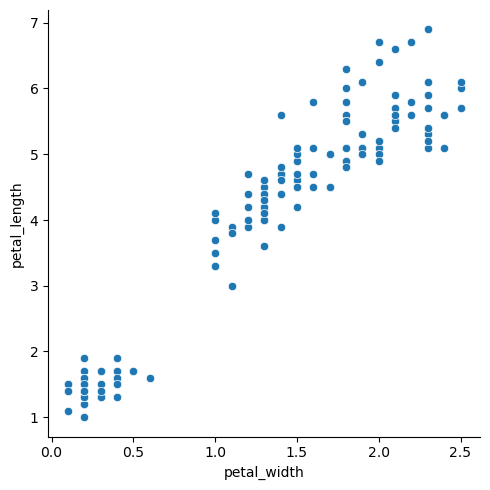

In [41]:
sns.relplot(data=df, x='petal_width', y='petal_length')
plt.show()

It looks like there is a relationship between length and width. The longer the petal, the wider it is.

Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.


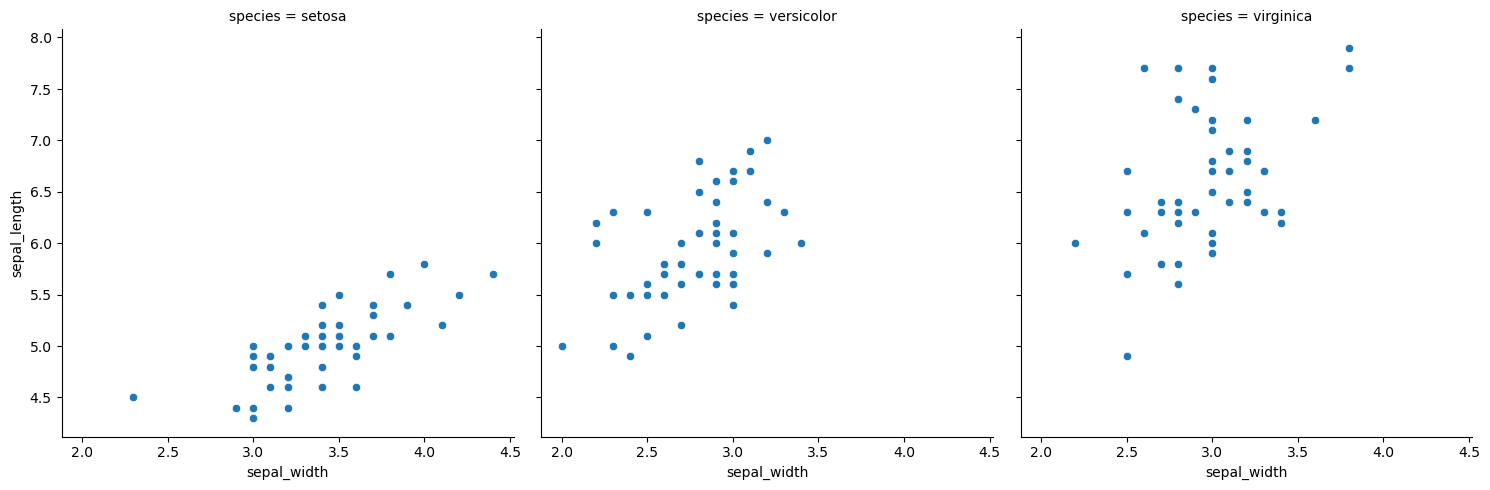

In [40]:
sns.relplot(data=df, x='sepal_width', y='sepal_length', col='species')
plt.show()

I could see (visually) approximately 30% accuracy if trying to predict based on sepal length and width.

Which features would be best used to predict species?


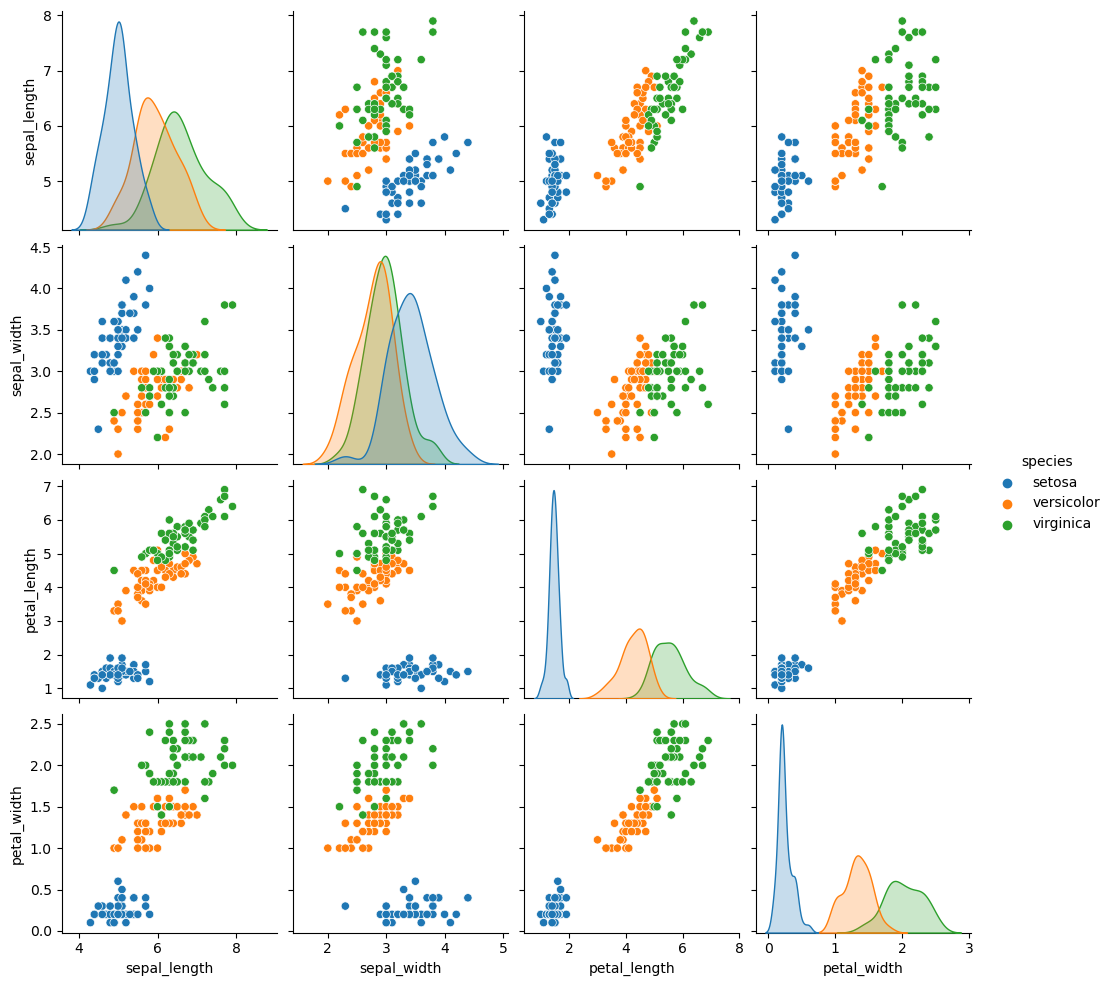

In [44]:
sns.pairplot(data=df,hue='species')
plt.show()

* sepal length and petal width
* petal length and petal width

Load the anscombe dataset from seaborn. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?



In [57]:
df_ans = sns.load_dataset('anscombe')
df_ans

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [48]:
df_ans.groupby('dataset').describe().round(2)

x                                           y                   \
        count mean   std  min  25%  50%   75%   max count mean   std   min   
dataset                                                                      
I        11.0  9.0  3.32  4.0  6.5  9.0  11.5  14.0  11.0  7.5  2.03  4.26   
II       11.0  9.0  3.32  4.0  6.5  9.0  11.5  14.0  11.0  7.5  2.03  3.10   
III      11.0  9.0  3.32  4.0  6.5  9.0  11.5  14.0  11.0  7.5  2.03  5.39   
IV       11.0  9.0  3.32  8.0  8.0  8.0   8.0  19.0  11.0  7.5  2.03  5.25   

                                  
          25%   50%   75%    max  
dataset                           
I        6.32  7.58  8.57  10.84  
II       6.70  8.14  8.95   9.26  
III      6.25  7.11  7.98  12.74  
IV       6.17  7.04  8.19  12.50

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

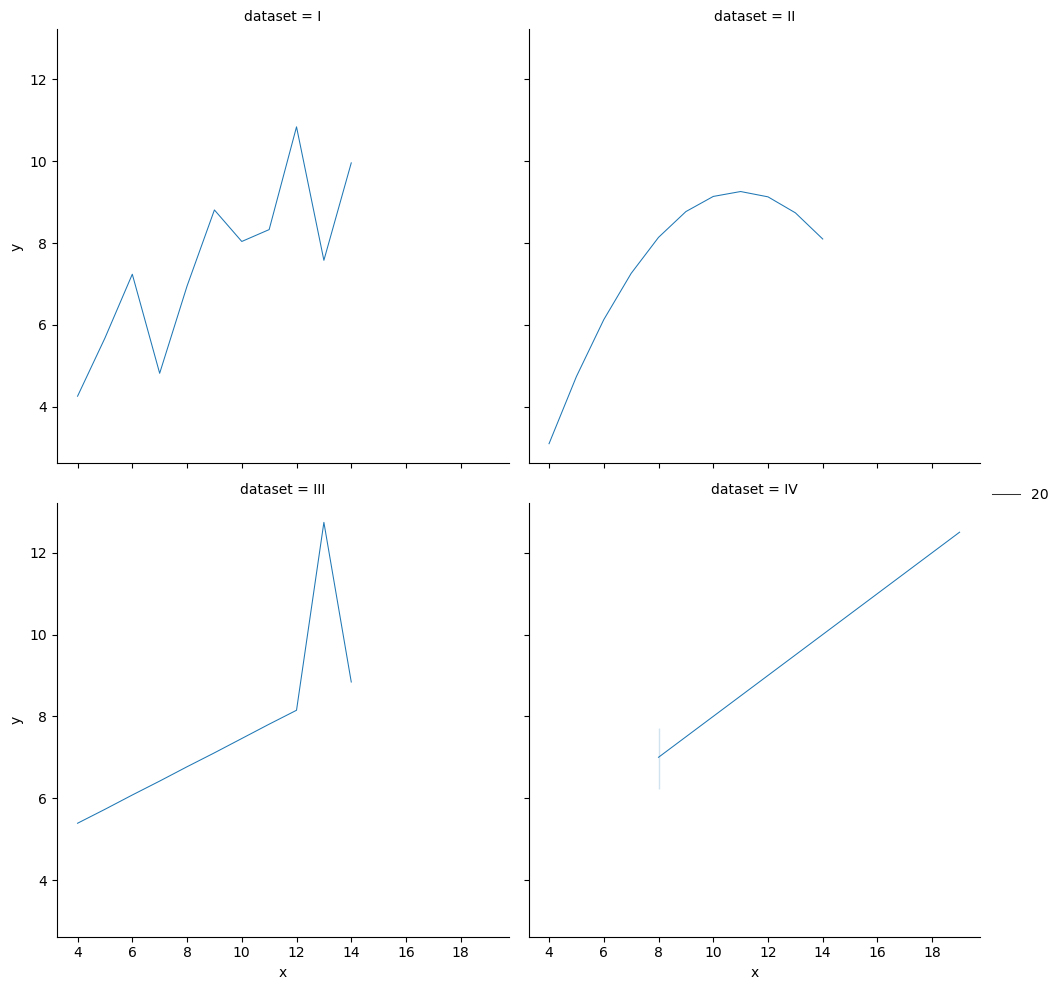

In [74]:
sns.relplot(data=df_ans, x='x', y='y', col='dataset', kind='line', size=20, col_wrap=2)
plt.show()

Load the InsectSprays dataset from pydataset and read it's documentation.

In [82]:
from pydataset import data

In [85]:
df_ins = data('InsectSprays')

In [93]:
data('InsectSprays', show_doc=True) 

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

Create a boxplot that shows the effectiveness of the different insect sprays.

In [103]:
df_ins = df_ins.rename(columns={'count':'insects'})

In [107]:
df_ins.head()

,insects,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


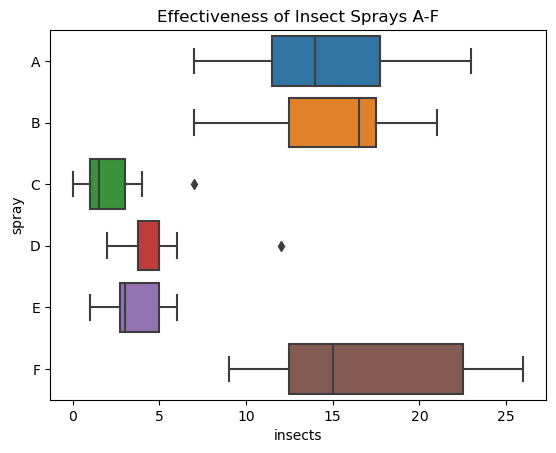

In [115]:
sns.boxplot(data=df_ins, x='insects', y='spray')

plt.title('Effectiveness of Insect Sprays A-F')

plt.show()

The most effective looks to be Spray 'F'.

Load the swiss dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:
* Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
* Does whether or not a province is Catholic influence fertility?
* What measure correlates most strongly with fertility?

In [117]:
df_swiss = data('swiss')

In [ ]:
data('swiss', show_doc=True) 

In [126]:
df_swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
 6   is_catholic       47 non-null     bool   
dtypes: bool(1), float64(4), int64(2)
memory usage: 3.7+ KB


In [121]:
df_swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [132]:
df_swiss['is_catholic']=(df_swiss.Catholic > 51.00) == True

In [133]:
df_swisssn

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


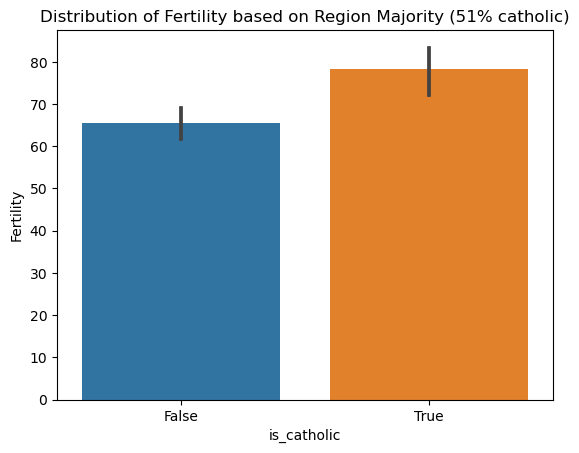

In [141]:
sns.barplot(data=df_swiss, x='is_catholic', y='Fertility')
plt.title('Distribution of Fertility based on Region Majority (51% catholic)')
plt.show()

<AxesSubplot:xlabel='Agriculture', ylabel='Fertility'>

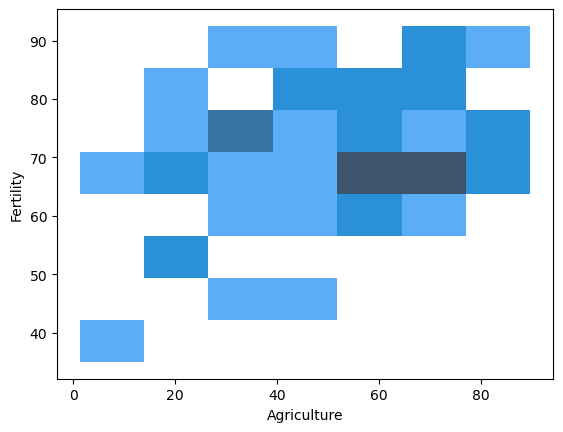

In [159]:
sns.histplot(data=df_swiss, x='Agriculture', y='Fertility')

<AxesSubplot:xlabel='Education', ylabel='Fertility'>

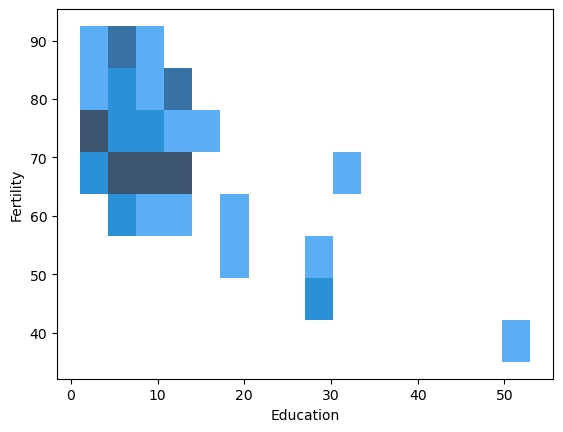

In [160]:
sns.histplot(data=df_swiss, x='Education', y='Fertility')

<AxesSubplot:xlabel='Examination', ylabel='Fertility'>

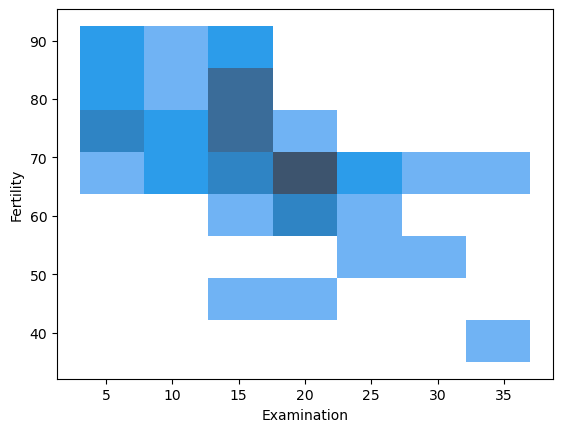

In [161]:
sns.histplot(data=df_swiss, x='Examination', y='Fertility')

<AxesSubplot:xlabel='Catholic', ylabel='Fertility'>

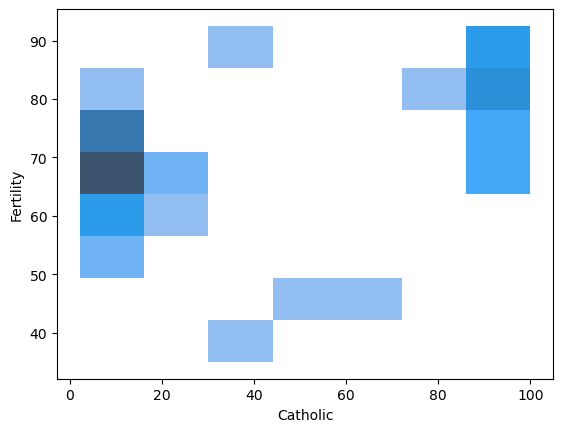

In [162]:
sns.histplot(data=df_swiss, x='Catholic', y='Fertility')

<AxesSubplot:xlabel='Infant.Mortality', ylabel='Fertility'>

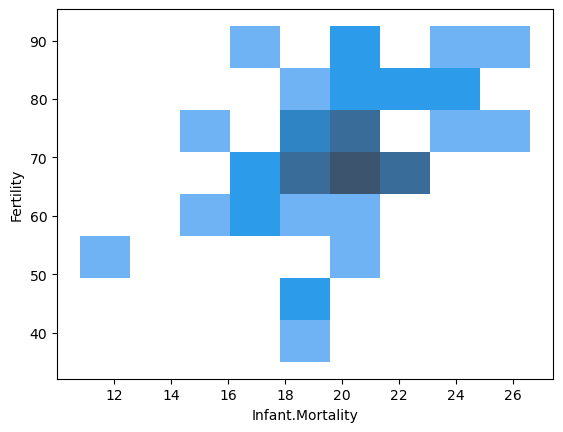

In [163]:
sns.histplot(data=df_swiss, x='Infant.Mortality', y='Fertility')

In [246]:
df_swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.498689
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.423305
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.602108
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.240375
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.963005
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.194802
is_catholic,0.498689,0.423305,-0.602108,-0.240375,0.963005,0.194802,1.000000


It looks like agriculture has the greatest link to fertility because as agriculture increases, so does fertility.

Load the chipotle dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.



In [168]:
import env

In [169]:
url_chipotle = env.get_db_url('chipotle')

In [170]:
cp = pd.read_sql('select * from orders', url_chipotle)

In [173]:
cp.item_price = (cp.item_price.str.replace('$','', regex=True)).astype(float)

In [194]:
cp_agg = cp.groupby('item_name').sum('item_price')\
.sort_values(by='quantity', ascending=False).head(4)

cp_agg

,id,order_id,quantity,item_price
item_name,,,,
Chicken Bowl,1780635,713926,761,7342.73
Chicken Burrito,1238770,497303,591,5575.82
Chips and Guacamole,1122252,449959,506,2201.04
Steak Burrito,818163,328437,386,3851.43


In [211]:
cp_agg_2 = cp_agg[['item_price']].T

<AxesSubplot:xlabel='item_name'>

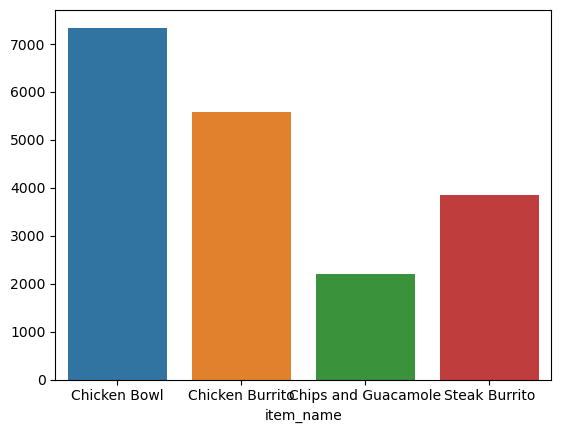

In [213]:
sns.barplot(data=cp_agg_2)

Load the sleepstudy dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.



In [215]:
df_sleep = data('sleepstudy')

In [217]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [219]:
df_sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [221]:
avg_time_by_sub = df_sleep.groupby('Subject').mean('Reaction')

In [228]:
avg_time_by_sub = avg_time_by_sub[['Reaction']]
avg_time_by_sub

,Reaction
Subject,
308,342.13383
309,215.23298
310,231.00127
330,303.22142
331,309.43605
332,307.30207
333,316.15831
334,295.30205
335,250.07004


<AxesSubplot:>

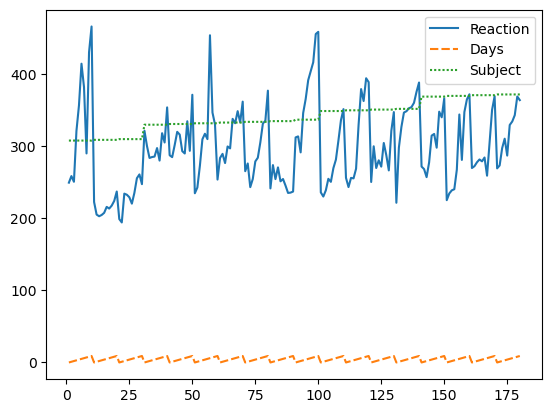

In [233]:
sns.lineplot(data=df_sleep)

<AxesSubplot:xlabel='Subject'>

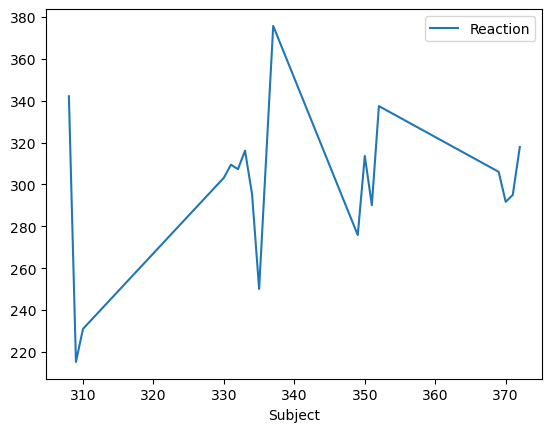

In [236]:
sns.lineplot(data=avg_time_by_sub)

In [247]:
df_sleep.corr()

,Reaction,Days,Subject
Reaction,1.000000,5.352302e-01,1.828947e-01
Days,0.535230,1.000000e+00,3.499509e-16
Subject,0.182895,3.499509e-16,1.000000e+00


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

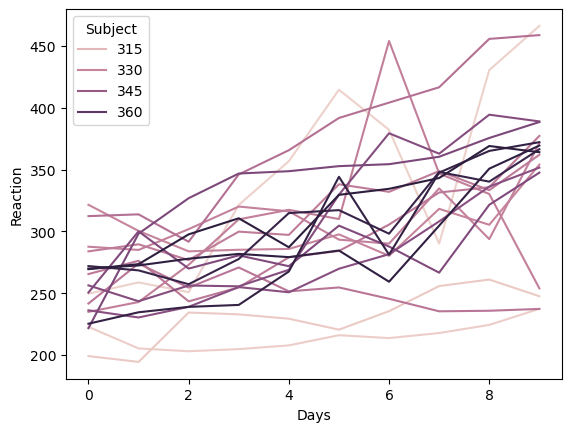

In [245]:
sns.lineplot(data=df_sleep, x='Days', y='Reaction', hue='Subject',\
            estimator=None)